In [1]:

import matplotlib.pyplot as plt
#import scipy.stats as sts
import numpy as np
import cmdstanpy ## import stan interface for Python
#from scipy.integrate import solve_ivp
#from matplotlib.gridspec import GridSpec
import os
import seaborn as sns
import pandas as pd
#import math
# from scipy.special import logit,expit
from importlib import reload 
import sys
# import patchworklib as pw
sys.path.append("..")
from statannotations.Annotator import Annotator
from itertools import product

import arviz
import matplotlib as mpl

tex_fonts = {
    # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 7,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "axes.grid": True,
    'grid.color': '#DDDDDD',
    'grid.linestyle': '-',
    'grid.linewidth': 0.3,
    "lines.markersize":4,
    
    'axes.axisbelow':True,
    'lines.linewidth':1,
    'pdf.fonttype':42,
    'axes.linewidth':0.6,
    'xtick.major.width':0.5,
    'ytick.major.width':0.5,
    'ytick.minor.width':0.3,

    'ytick.major.pad':0.2,
        "xtick.major.size":3,
    "ytick.major.size":3,
}

plt.rcParams.update(tex_fonts)



# label_size = 30
# mpl.rcParams['xtick.labelsize'] = label_size 
# mpl.rcParams['ytick.labelsize'] = label_size 
# mpl.rcParams['lines.markersize'] = 20  
# plt.rcParams['axes.grid'] = True
# mpl.rcParams['font.family']='Helvetica'

ratio= 2/(1+np.sqrt(5))

width = 520.344
if os.name == "nt": ## adds compiler to path in Windows
    cmdstanpy.utils.cxx_toolchain_path() 
    
# %config InlineBackend.close_figures=False # keep figures open in pyplot
# #%config InlineBackend.print_figure_kwargs = {'bbox_inches':"tight", 'pad_inches':2}


# sigma = 0.15

# switchtime = 21
# numObs = 27
# tmax = 35

# # time_index = np.concatenate((np.logspace(-1,np.log10(switchtime),num=int(numObs/2)), (np.logspace(-1,np.log10(tmax-switchtime),num=int(numObs/2)))+switchtime))
# #time_index = np.linspace(tmax/numObs,tmax,numObs)
# switch = (numofbrduint+2)*(numofki67int+2)
# y0_est = np.zeros((numofki67int+2)*(numofbrduint+2)*2)

time_index_equilibrium = np.linspace(10000/1, 10000, 1)
my_pal = {"4cm": "g", 
          "4em": "m", 
          "Donor":"#a4e0ef", 
          "Host":"#ff7f0e",
#             "donor":"blue", 
#           "host":"#DC582A",
         "WT":"#02feff",
         "Young CHIM":"#7d81fc",
         "Old CHIM":"#f50aff"}

my_marks = {"Donor": "o",#"$\circ$", 
           "Host": "^",
         "WT":"o",
         "Young CHIM":"P",
         "Old CHIM":"^"}

scatterkwags = {"palette": my_pal,
                  "markers":my_marks,
                    'edgecolor':"k",
                "alpha":0.7,
                "zorder":1
                
}

df = pd.read_csv('/home/elise/Code/BRDU/Elisehasbeenusing_dataUCL.csv',index_col='index')
df['age_cat']=np.where(df.age < 113, 'WT', np.where((df.age >= 113) & (df.age < 180), 'Young CHIM', 'Old CHIM'))

df['ADH'] = df['ADH'].replace('donor','Donor')
df['ADH'] = df['ADH'].replace('host','Host')

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def enumerated_product(*args):
    yield from zip(product(*(range(len(x)) for x in args)), product(*args))
    


(0, 0, 0)
('Donor', '4cm', 'Young CHIM')
temporal-20230911161545_3.csv
temporal-20230911161545_5.csv
temporal-20230911161545_4.csv
temporal-20230911161545_2.csv
temporal-20230911161545_1.csv


/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-4cmdonor_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)
/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-4cmdonor_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(0, 0, 1)
('Donor', '4cm', 'Old CHIM')
temporal-20230911161239_5.csv
temporal-20230911161239_4.csv
temporal-20230911161239_1.csv
temporal-20230911161239_2.csv
temporal-20230911161239_3.csv


/opt/mesh/tiree/elise/samples_1/temporalold_r1/stan-cache-4cmdonor_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(0, 1, 0)
('Donor', '4em', 'Young CHIM')
temporal-20230911161545_3.csv
temporal-20230911161545_5.csv
temporal-20230911161545_4.csv
temporal-20230911161545_2.csv
temporal-20230911161545_1.csv


/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-4emdonor_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(0, 1, 1)
('Donor', '4em', 'Old CHIM')
temporal-20230911161309_5.csv
temporal-20230911161309_3.csv
temporal-20230911161309_2.csv
temporal-20230911161309_1.csv
temporal-20230911161309_4.csv


/opt/mesh/tiree/elise/samples_1/temporalold_r1/stan-cache-4emdonor_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(1, 0, 0)
('Host', '4cm', 'Young CHIM')
temporal-20230911161607_5.csv
temporal-20230911161607_3.csv
temporal-20230911161607_1.csv
temporal-20230911161607_2.csv
temporal-20230911161607_4.csv


/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-4cmhost_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(1, 0, 1)
('Host', '4cm', 'Old CHIM')
temporal-20230911161239_5.csv
temporal-20230911161239_4.csv
temporal-20230911161239_1.csv
temporal-20230911161239_2.csv
temporal-20230911161239_3.csv


/opt/mesh/tiree/elise/samples_1/temporalold_r1/stan-cache-4cmhost_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(1, 1, 0)
('Host', '4em', 'Young CHIM')
temporal-20230911161518_1.csv
temporal-20230911161518_4.csv
temporal-20230911161518_5.csv
temporal-20230911161518_2.csv
temporal-20230911161518_3.csv


/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-4emhost_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


(1, 1, 1)
('Host', '4em', 'Old CHIM')
temporal-20230911161238_4.csv
temporal-20230911161238_1.csv
temporal-20230911161238_5.csv
temporal-20230911161238_3.csv
temporal-20230911161238_2.csv


/opt/mesh/tiree/elise/samples_1/temporalold_r1/stan-cache-4emhost_1/paras.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfslice['expt_time'] = dfslice['expt_time'].replace(0,0.1)


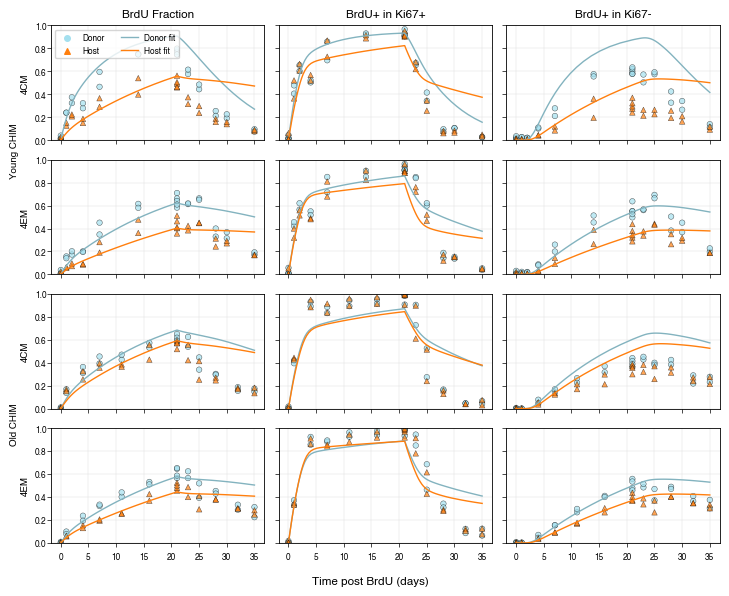

In [2]:
fig, ax = plt.subplots(4,3 , figsize=set_size(width, subplots=(4, 3)), sharex=True,sharey=True)

youngfile = '/opt/mesh/tiree/elise/samples_1/temporalyoung_r1/stan-cache-'
oldfile = '/opt/mesh/tiree/elise/samples_1/temporalold_r1/stan-cache-'

kindc = 'chimera'
agec = ['Young CHIM','Old CHIM']
ADHc = ['Donor','Host']
populationc = ['4cm', '4em']

colors = ["#83B3BF","#ff7f0e"]

typei = "linear"


dfold = df[(df['kind'] == 'chimera')&(df['ADH'] != 'all')]



for idx, adhpop in enumerated_product(ADHc,populationc, agec):
    print(idx)
    print(adhpop)
    
    fl = []
    fb = []
    
    #data slicing and manulipulation
    if adhpop[2]=='Young CHIM':
        location = youngfile+adhpop[1]+adhpop[0].lower()+'_1/'
    else:
        location = oldfile+adhpop[1]+adhpop[0].lower()+'_1/'

    sys.path.insert(1, location)
    import paras
    reload(paras)
    
    for f_name in os.listdir(location):
        if f_name.endswith('.csv')&f_name.startswith('temporal'):
            print(f_name)
            fb.append(location+f_name)
        elif f_name.endswith('.csv')&f_name.startswith('temporal'):
            print(f_name)
            fl.append(location+f_name)

    if typei == "branched":
        sam = cmdstanpy.from_csv(fl)
    else:
        sam = cmdstanpy.from_csv(fb)


    time_index_calc = np.concatenate((np.logspace(-1,np.log10(paras.switchtime),num=int(100/2)), (np.logspace(-1,np.log10(paras.tmax-paras.switchtime),num=int(100/2)))+paras.switchtime))

    y1 =  sam.stan_variable("f_brdhi_calc")
    y2 =  sam.stan_variable("f_brdhi_kihi_calc")
    y3 =  sam.stan_variable("f_brdhi_kilo_calc")
    

    #BRDU frac
    ax1 = ax[2*idx[2]+idx[1],0]

    mB = np.median(y1[:,:], axis=0)
    lB, uB = np.percentile(y1[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB,label=adhpop[0]+' fit',c = colors[idx[0]])
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='Donor':
        sns.scatterplot(data = dfold[(dfold['population'] == adhpop[1])&(dfold['age_cat'] == adhpop[2])], 
                        x="expt_time",
                y="BrdUfrac", hue='ADH',ax=ax1, style='ADH',
               **scatterkwags)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim([0,1])
    
    #BRDU+ in ki+ frac
    ax1 = ax[2*idx[2]+idx[1],1]

    mB = np.median(y2[:,:], axis=0)
    lB, uB = np.percentile(y2[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB,c = colors[idx[0]])
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='Donor':
        sns.scatterplot(data = dfold[(dfold['population'] == adhpop[1])&(dfold['age_cat'] == adhpop[2])], x="expt_time",
                y="BrdUfracInKi67pos", hue='ADH',ax=ax1, style='ADH',
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim([0,1])
    
    #BRDU+ in ki+ frac
    ax1 = ax[2*idx[2]+idx[1],2]

    mB = np.median(y3[:,:], axis=0)
    lB, uB = np.percentile(y3[:,:], axis=0, q=[2.5, 97.5])
    ax1.plot(time_index_calc, mB,c = colors[idx[0]])
#     ax1.fill_between(time_index_calc, lB, uB, alpha=0.4)
    
    if adhpop[0]=='Donor':
        sns.scatterplot(data = dfold[(dfold['population'] == adhpop[1])&(dfold['age_cat'] == adhpop[2])], x="expt_time",
                y="BrdUfracInKi67neg", hue='ADH',ax=ax1, style='ADH',
               **scatterkwags,legend=False)    
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim([0,1])
    


fig.text(0,0.7,'Young CHIM',rotation='vertical')
fig.text(0,0.25,'Old CHIM',rotation='vertical')
fig.supxlabel('Time post BrdU (days)')
ax[0,2].set_title('BrdU+ in Ki67-')
ax[0,0].set_ylabel('4CM')
ax[1,0].set_ylabel('4EM')
ax[0,0].set_title('BrdU Fraction')
ax[2,0].set_ylabel('4CM')
ax[3,0].set_ylabel('4EM')
ax[0,1].set_title('BrdU+ in Ki67+')
ax[1,0].get_legend().remove()
ax[2,0].get_legend().remove()
ax[3,0].get_legend().remove()

handles, labels = ax[0,0].get_legend_handles_labels()
order = [1,2,0,3]


# Place the legend
lgd = ax[0,0].legend(
    [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper left", 
    ncol=2,
)
# # Modify the point edge colour
# for ha in ax[0,0].legend_.legendHandles[0:2]:
#     ha.set_edgecolor("black")


plt.tight_layout()

fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/figS2.pdf', 
            dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

# fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Data_elise/brdUFracAll_YoungandOld_overBrduTime_byADH.png',
#             dpi='figure', format='png',
#         bbox_inches='tight', pad_inches=0.1)    